<a href="https://colab.research.google.com/github/SREEHARSHA04/Object-recognition_using_ResNet50_CNN/blob/main/Object_Recognition_using_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training an object recognition model using Transfer learning --> ResNet 50

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c cifar-10

100% 714M/715M [00:23<00:00, 42.3MB/s]
100% 715M/715M [00:23<00:00, 32.2MB/s]


In [ ]:
# Extracting the Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
## Extractinf the 7z file 7z is a compressed archive file format that supports several different data compression, encryption and pre-processing algorithms.
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 30.0 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [ ]:
ls

cifar-10.zip  sample_data/          test.7z  train.7z
kaggle.json   sampleSubmission.csv  train/   trainLabels.csv


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train') ## Making a list of all the training images data

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['30772.png', '13645.png', '35369.png', '15945.png', '28725.png']
['15408.png', '19374.png', '7963.png', '30060.png', '25061.png']


Processing the labels

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile

In [ ]:
labels_df[labels_df['id'] == 30751]

id       label
30750  30751  automobile

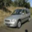

In [ ]:
# Displaying the 30751th image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/30751.png')
cv2_imshow(img)

In [ ]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [ ]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [ ]:
## Encoding the labels to a numeric value manually
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


In [ ]:
labels_df.head()

id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile

In [ ]:
id_list = list(labels_df['id']) ## Making a list of ID column from the trainLabels file

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [ ]:
# Convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png') ## Opening the id-th folder and storing it in the image variable
  image = np.array(image)
  data.append(image)
  len(data)

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
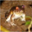

In [ ]:
data[0]

In [ ]:
# Convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape) ## 50000 images of size 32 x 32 and of RGB format
print(Y.shape) ## 50000 labels for the 50000 images

(50000, 32, 32, 3)
(50000,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# Min - Max Scaling the data to make the computataion process effective

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]], dtype=uint8)
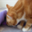

In [ ]:
X_train[0]

Building the nural network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
## Demo of a neural network
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),  ## Input layer flattening the image
    keras.layers.Dense(64, activation='relu'),    ## One hidden layer with 64 neurons
    keras.layers.Dense(num_of_classes, activation='softmax') ## Output layer with 10 different output classes
## The node that has the highest probability will be the output of the model
])

In [ ]:
# Compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  ## If one hot encoding was used then categorical cross entorpy should be used as a lost function
              metrics=['acc'])

In [ ]:
# Training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 7s 4ms/step - loss: 2.0106 - acc: 0.2707 - val_loss: 1.9139 - val_acc: 0.2993
Epoch 2/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.8655 - acc: 0.3331 - val_loss: 1.8026 - val_acc: 0.3565
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7992 - acc: 0.3576 - val_loss: 1.8067 - val_acc: 0.3383
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7679 - acc: 0.3670 - val_loss: 1.7377 - val_acc: 0.3680
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7409 - acc: 0.3769 - val_loss: 1.6978 - val_acc: 0.3882
Epoch 6/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7279 - acc: 0.3812 - val_loss: 1.7159 - val_acc: 0.3817
Epoch 7/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.7123 - acc: 0.3866 - val_loss: 1.7082 - val_acc: 0.3868
Epoch 8/10
1125/1125 [==============================] - 4s 3ms

39% accuracy is obtained

Transfer learning --> Training the ResNet50 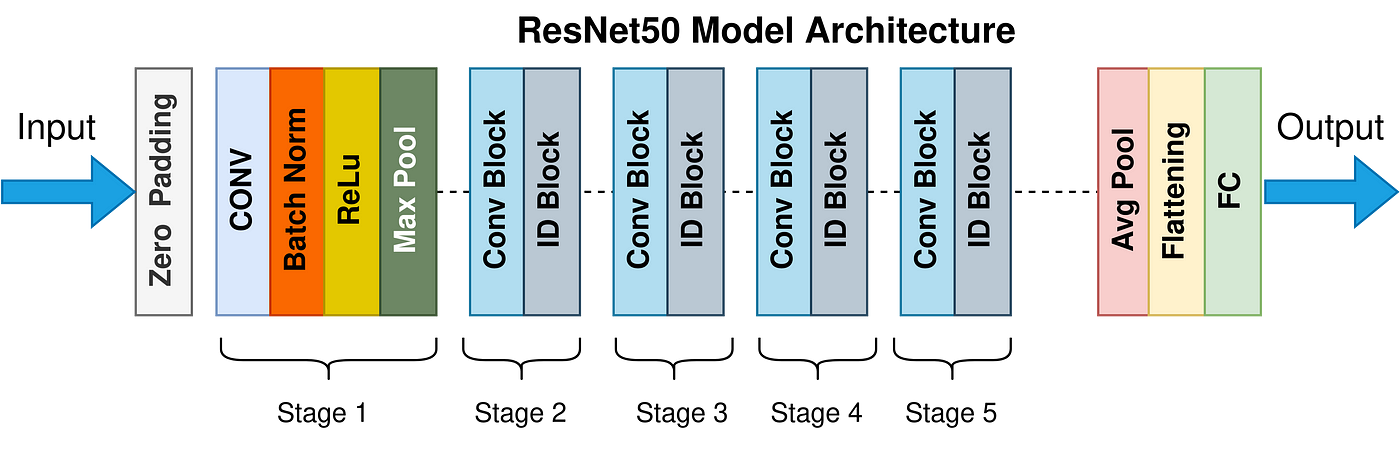

Total number of convolutional blocks: 3 (Stage 2) + 4 (Stage 3) + 6 (Stage 4) + 3 (Stage 5) = 16 convolutional blocks

Pooling is done to achieve location invariance

In [ ]:
from tensorflow.keras import Sequential, models, layers ## Sequential --> used to wrap up custom layers in the middle of the model
from tensorflow.keras.layers import Dense, Dropout, Flatten ## Dropout used to prevent overfitting of the model by turning off some neurons in the middle
from tensorflow.keras.layers import BatchNormalization  ## BatchNormalization Used to normalize the image values after them coming out of the of a hidden convolutional layer
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()
## Using pre trained weights of the imagenet dataset (14 million dataset collection)
## include_top=False --> done to drop the output layer as we only need 10 neurons and here we may have excess neurons
## input_shape=(256,256,3) --> shape in which the image should be

94765736/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
num_of_classes = 10

model = models.Sequential() ## Used for addig layers
model.add(layers.UpSampling2D((2,2))) ## Bringing the size of the images to 256 x 256 from 32 x 32
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) ## Prevent over fitting by switching off(making 0) certain neurons at each epochs
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])
## If one hot encoding was used then categorical cross entorpy should be used as a lost function

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10) ## validation_split=0.1 --> Like test size in train test split

Epoch 1/10
1125/1125 [==============================] - 472s 388ms/step - loss: 1.6613 - acc: 0.4529 - val_loss: 0.9087 - val_acc: 0.7508
Epoch 2/10
1125/1125 [==============================] - 430s 382ms/step - loss: 0.9984 - acc: 0.7057 - val_loss: 0.4582 - val_acc: 0.8978
Epoch 3/10
1125/1125 [==============================] - 437s 388ms/step - loss: 0.7319 - acc: 0.8103 - val_loss: 0.3676 - val_acc: 0.9135
Epoch 4/10
1125/1125 [==============================] - 437s 388ms/step - loss: 0.5660 - acc: 0.8690 - val_loss: 0.2890 - val_acc: 0.9323
Epoch 5/10
1125/1125 [==============================] - 430s 382ms/step - loss: 0.4333 - acc: 0.9127 - val_loss: 0.2558 - val_acc: 0.9337
Epoch 6/10
1125/1125 [==============================] - 430s 382ms/step - loss: 0.3433 - acc: 0.9358 - val_loss: 0.2453 - val_acc: 0.9355
Epoch 7/10
1125/1125 [==============================] - 437s 389ms/step - loss: 0.2764 - acc: 0.9537 - val_loss: 0.2217 - val_acc: 0.9427
Epoch 8/10
1125/1125 [============

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 41s 117ms/step - loss: 0.2360 - acc: 0.9343
Test Accuracy = 0.9343000054359436


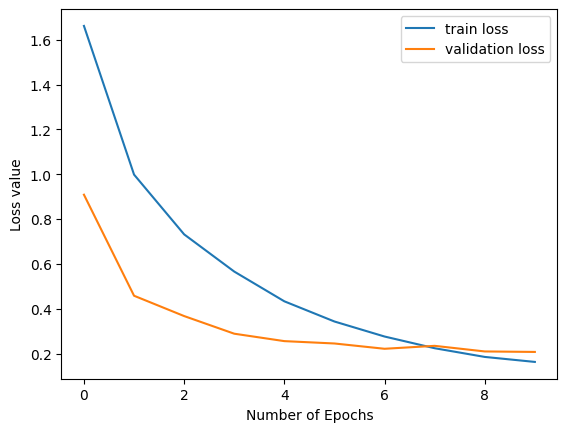

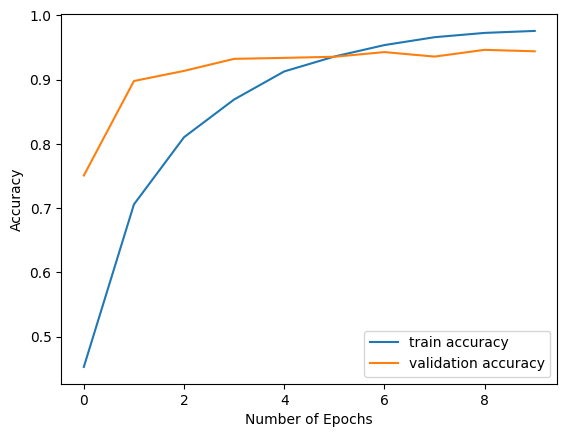

In [ ]:
h = history

# Plotting the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss value")
plt.legend()
plt.show()

# Plotting the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()